Decision Tree - Train and Visualize
Prediction using Decision Tree Algorithm

● Create the Decision Tree classifier and visualize it graphically.

● The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingl

Import Libraries: We will import libraries as we need.

In [ ]:
import pandas as pd

Iris Data Set:
Load the csv file and define the input and output variables

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Iris.csv', index_col = 0)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


Since No Null values observed we pair plot to visualise the attributes.

In [ ]:
target = df['Species']
df1 = df.copy()
df1 = df1.drop('Species', axis =1)
df1.shape

(150, 4)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

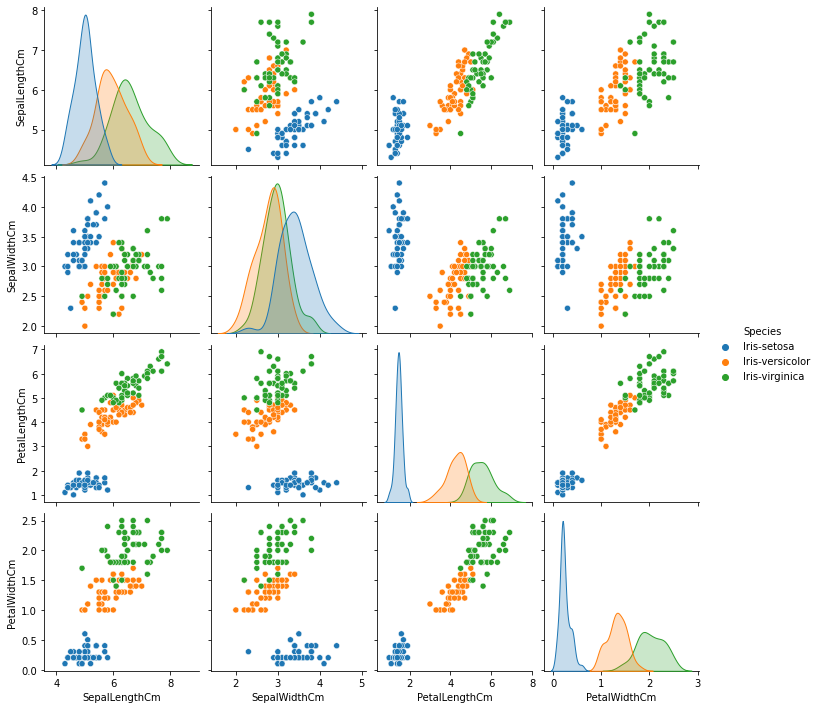

In [ ]:
sns.pairplot(df, hue = 'Species')

we observe that "iris-setosa" makes a separate cluster in every graph, while the other two species are overlapping a bit on each other.

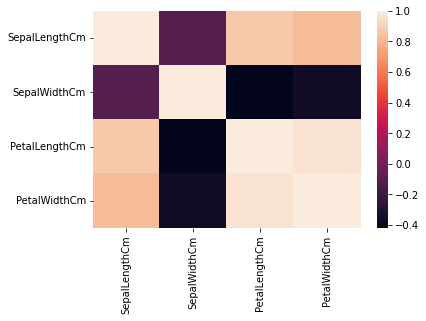

In [ ]:
sns.heatmap(df.corr())

we can observe that Petal length is highly related to petal width and Sepal lenth is not related sepal width.

MODEL TRAINING

we encode the data then split the data into test and train for trainig our model.

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
X = df.iloc[:, [0, 1, 2, 3]].values #Attributes

le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])

y = df['Species'].values  #Labels

print("The shape of the data is-", df.shape)

The shape of the data is- (150, 5)


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.2, random_state = 42 )

Importing necessary libraries for Implementation of decision tree classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [ ]:
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

Predicting the values of test data

In [ ]:
y_pred = dtree.predict(X_test)
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Text(0.5, 1.0, 'Accuracy Score: 1.0')

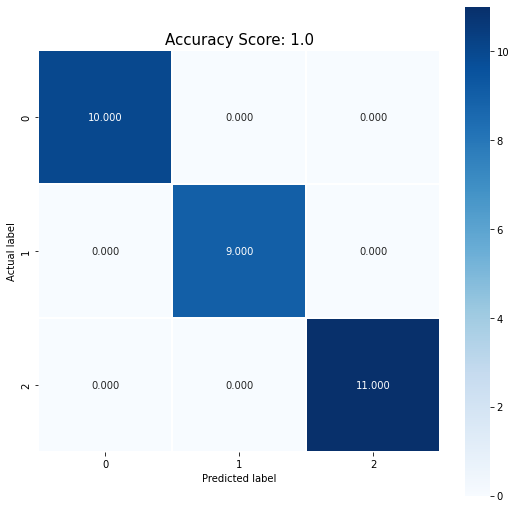

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(9,9))

sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues');

plt.ylabel('Actual label');
plt.xlabel('Predicted label');

all_sample_title = 'Accuracy Score: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

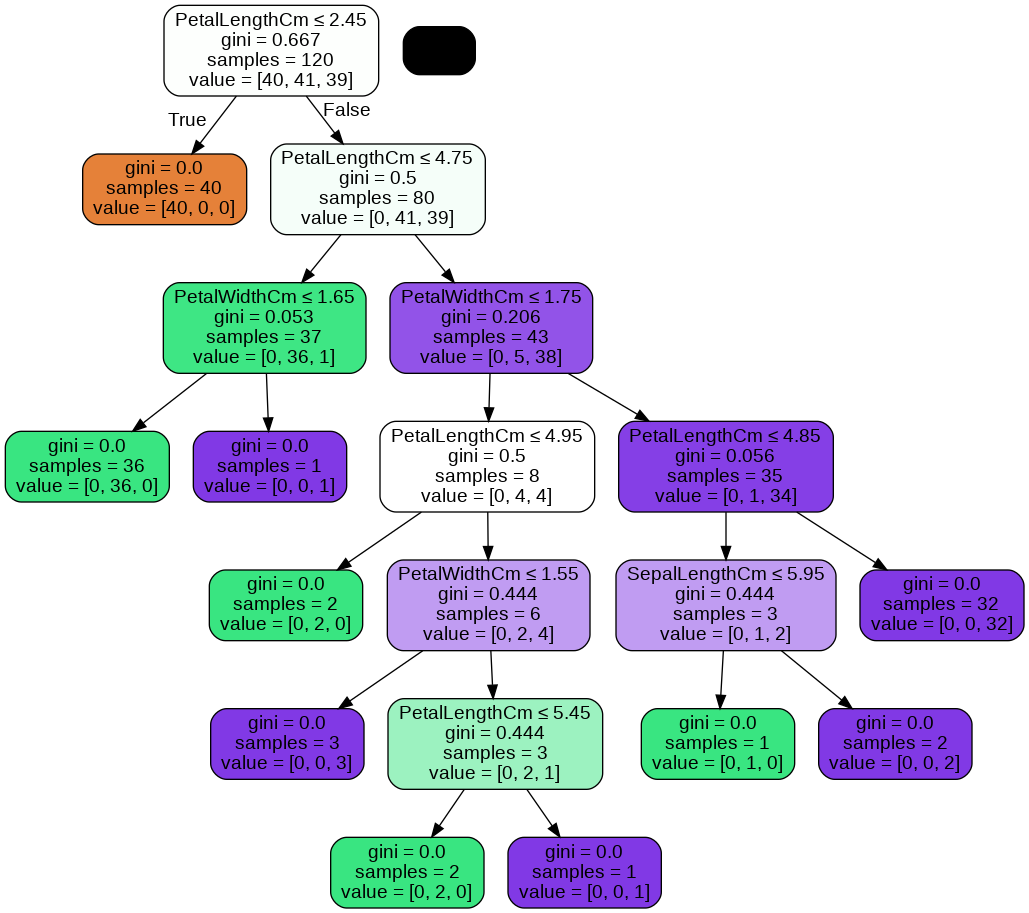

In [ ]:
# Visualize the graph
dot_data = StringIO()

export_graphviz(dtree, out_file=dot_data, feature_names= df1.columns ,  
                filled=True, rounded=True,special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

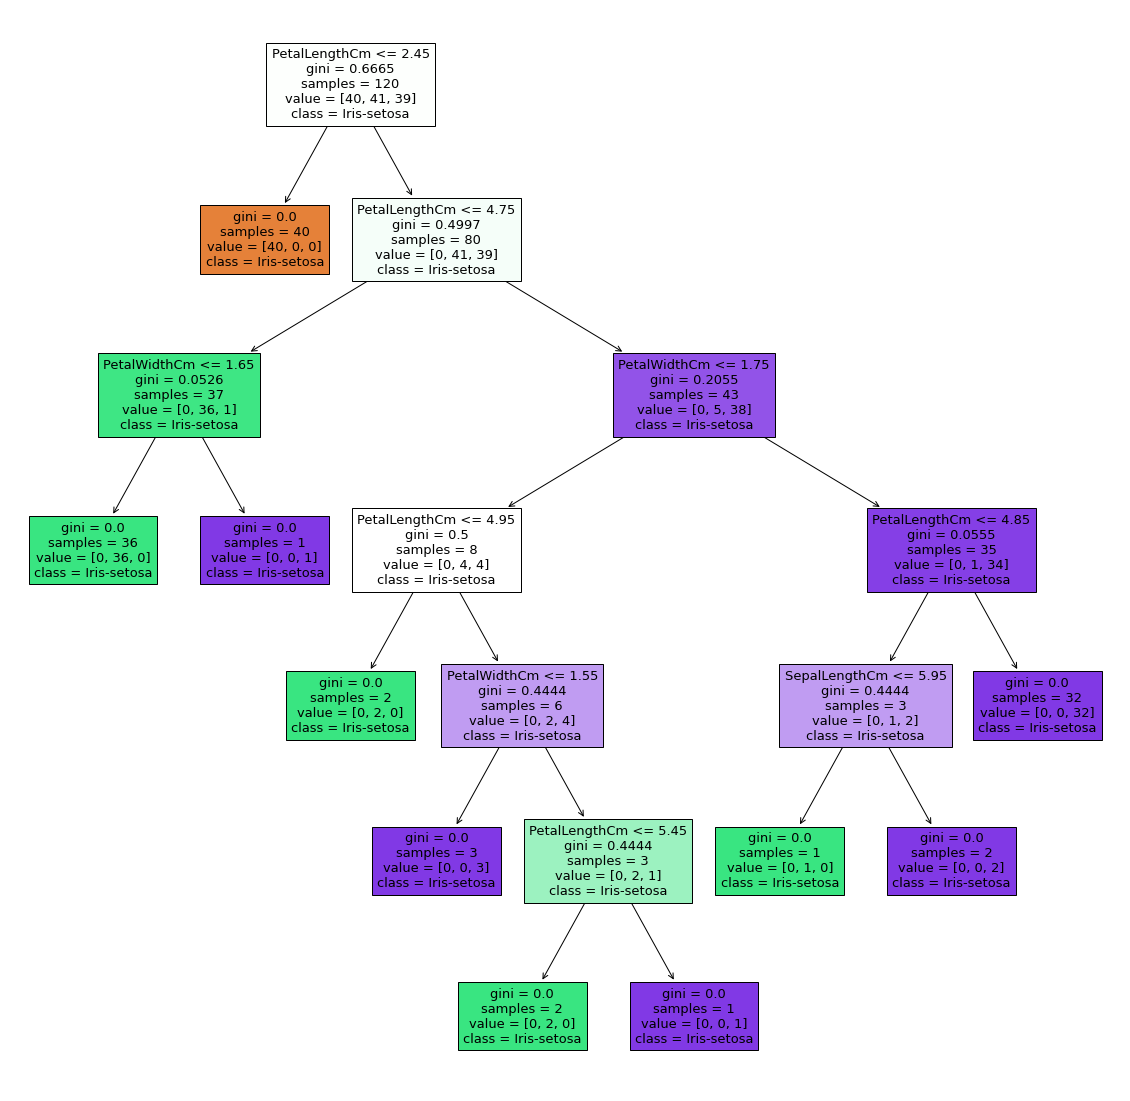

In [ ]:
plt.figure(figsize = (20,20))
dec_tree = plot_tree(dtree, feature_names = df1.columns, 
                     class_names = target.values, filled = True , precision = 4);